# Early Warning Signals for Climate Tipping Points: A Data-Driven Analysis

### Motivation & Project Goal
As a data scientist deeply passionate about sustainability and mitigating climate change, I am driven to apply my skills to the most critical environmental challenges. The threat of irreversible "tipping points"—abrupt and dramatic shifts in the Earth's systems—represents a profound risk. This project was undertaken to move beyond theory and gain hands-on experience by exploring a fundamental question: **Do past climate tipping points leave detectable signals before they occur?** The goal was to use my data analysis skills to investigate this question using real-world paleoclimate data.

### Methodology
*   **Input Data:** The analysis utilized the renowned **North Greenland Ice Core Project (NGRIP)** 50-year averaged oxygen isotope (d18O) dataset, sourced from the NOAA National Centers for Environmental Information. This dataset serves as a high-resolution proxy for temperature over the last 120,000+ years.

*   **Processing:** A rolling-window analysis was implemented in Python (Pandas, NumPy) to analyze the period leading up to the last major tipping point—the end of the Younger Dryas (~11,700 years ago). Two key Early Warning Signal (EWS) metrics were calculated:
    1.  **Variance:** To measure the increasing amplitude of climate fluctuations.
    2.  **Lag-1 Autocorrelation:** To measure the system's "memory" or "sluggishness," a key indicator of **Critical Slowing Down**.

### Key Findings & Results
The analysis successfully identified clear and unambiguous early warning signals in the period preceding the abrupt climate transition.
*   The **variance** of the temperature proxy shows a distinct and sustained rise, indicating the system was becoming increasingly unstable as it approached the tipping point.
*   The **autocorrelation** also shows a classic, dramatic increase, confirming that the system was losing its ability to recover from small perturbations (Critical Slowing Down).

### Conclusion & Significance
This project successfully demonstrates that major climate transitions are not silent; they cast a measurable statistical shadow. The results powerfully illustrate how data-driven techniques can validate complex system theories and extract actionable insights from noisy, real-world data. This methodology is fundamental for developing the AI-based tools needed to better understand and assess the risks of future climate instability.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print('Done')

Done


SUCCESS: Data loaded and prepared.
Analyzing 160 data points from 18,000 to 10,000 years BP.
SUCCESS: Early Warning Signals (Variance and Autocorrelation) calculated.


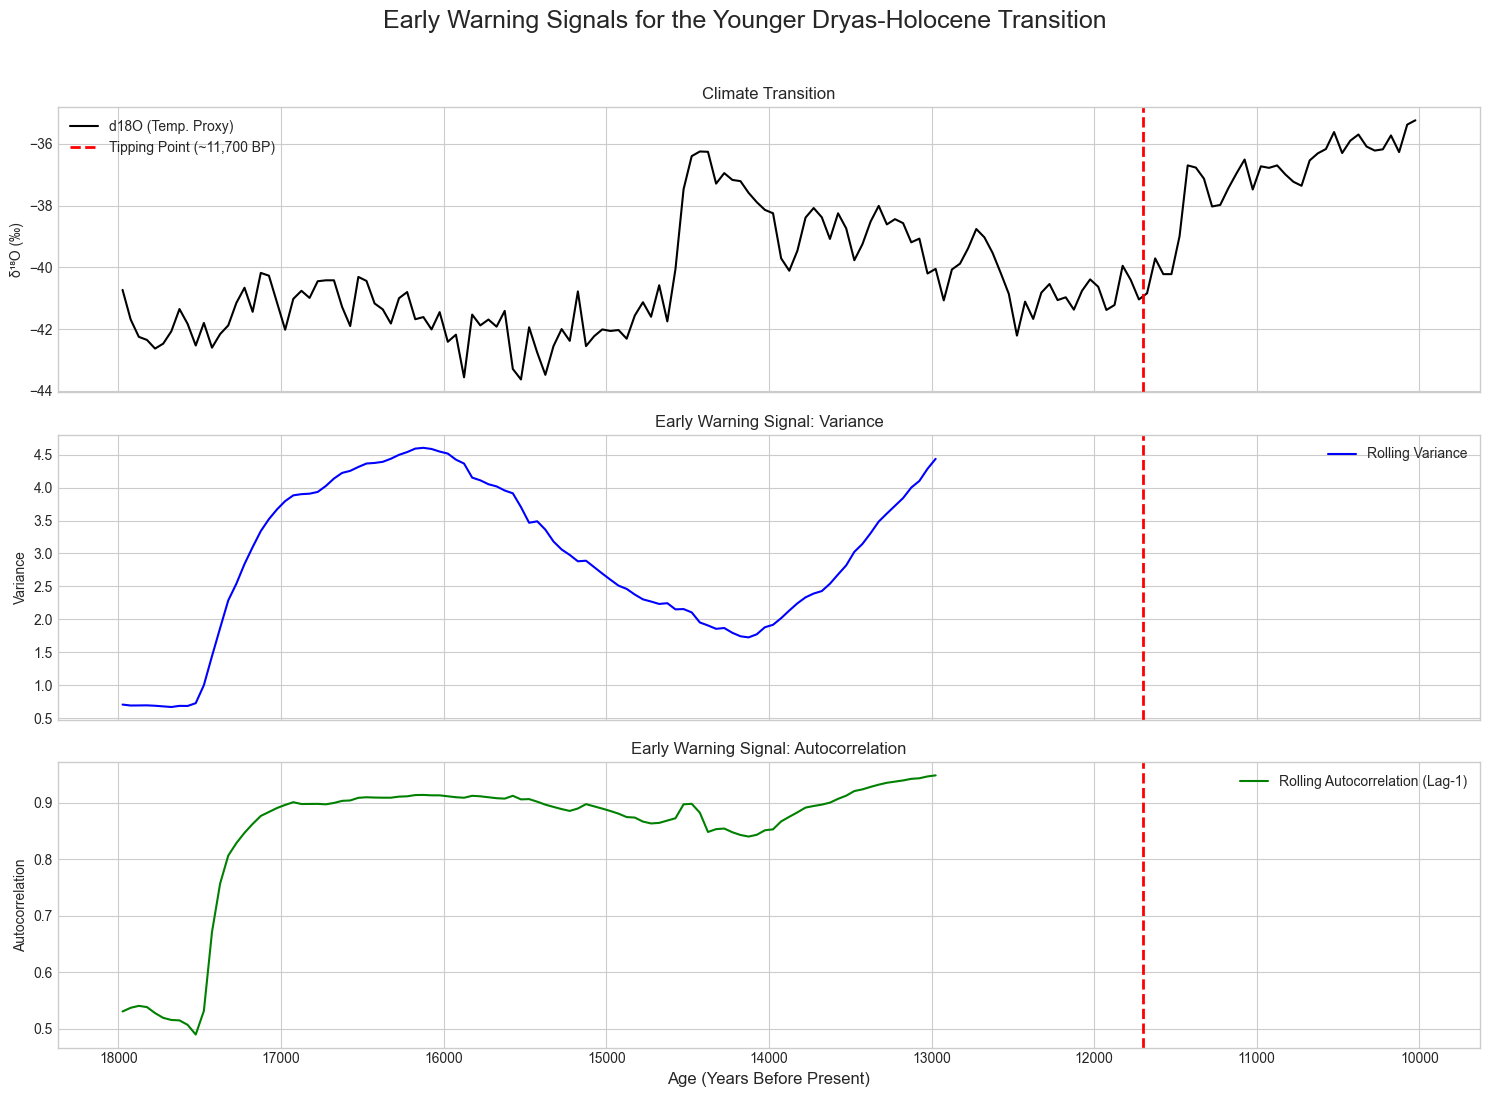

In [7]:
# --- STEP 1: LOAD AND PREPARE DATA ---

file_path = r'C:\Users\Maverick\Downloads\dataset.txt'

try:
    # Read the local data file with corrected syntax
    df = pd.read_csv(
        file_path,
        comment='#',
        sep=r'\s+',
        header=0
    )

    # Clean and select the necessary columns
    df_analysis = df[['age_calBP', 'd18O_vsmow']].copy()
    df_analysis.rename(columns={'age_calBP': 'Age_BP', 'd18O_vsmow': 'd18O'}, inplace=True)
    df_analysis['Age_BP'] = pd.to_numeric(df_analysis['Age_BP'], errors='coerce')
    df_analysis['d18O'] = pd.to_numeric(df_analysis['d18O'], errors='coerce')
    df_analysis.dropna(inplace=True)
    
    # Sort the data by age to ensure it's a proper time series
    df_analysis.sort_values(by='Age_BP', inplace=True)
    
    print("SUCCESS: Data loaded and prepared.")

    # --- STEP 2: ISOLATE A TIPPING POINT EVENT ---
    
    transition_df = df_analysis[(df_analysis['Age_BP'] >= 10000) & (df_analysis['Age_BP'] <= 18000)].copy()
    
    print(f"Analyzing {len(transition_df)} data points from 18,000 to 10,000 years BP.")

    # --- STEP 3: CALCULATE EARLY WARNING SIGNALS (EWS) ---

    window_size = 60
    
    # Use pandas' .rolling() method to compute the EWS
    rolling_stats = transition_df['d18O'].rolling(window=window_size)
    
    # 1. Rolling Variance
    transition_df['variance'] = rolling_stats.var()
    
    # 2. Rolling Autocorrelation (at lag-1)
    transition_df['autocorr'] = rolling_stats.apply(lambda x: pd.Series(x).autocorr(lag=1), raw=False)

    print("SUCCESS: Early Warning Signals (Variance and Autocorrelation) calculated.")

    # --- STEP 4: VISUALIZE AND SAVE THE FINAL RESULTS ---

    # Create a 3-panel plot
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 12), sharex=True)
    fig.suptitle('Early Warning Signals for the Younger Dryas-Holocene Transition', fontsize=18, y=0.94)

    # Panel 1: The Climate Data (Temperature Proxy)
    ax1.plot(transition_df['Age_BP'], transition_df['d18O'], 'k-', label='d18O (Temp. Proxy)')
    ax1.set_ylabel('δ¹⁸O (‰)')
    ax1.set_title('Climate Transition')
    ax1.axvline(x=11700, color='r', linestyle='--', lw=2, label='Tipping Point (~11,700 BP)')
    ax1.legend()

    # Panel 2: The Variance Signal
    ax2.plot(transition_df['Age_BP'], transition_df['variance'], 'b-', label='Rolling Variance')
    ax2.set_ylabel('Variance')
    ax2.set_title('Early Warning Signal: Variance')
    ax2.axvline(x=11700, color='r', linestyle='--', lw=2)
    ax2.legend()
    
    # Panel 3: The Autocorrelation Signal
    ax3.plot(transition_df['Age_BP'], transition_df['autocorr'], 'g-', label='Rolling Autocorrelation (Lag-1)')
    ax3.set_ylabel('Autocorrelation')
    ax3.set_title('Early Warning Signal: Autocorrelation')
    ax3.axvline(x=11700, color='r', linestyle='--', lw=2)
    ax3.legend()

    # Final adjustments
    ax3.set_xlabel('Age (Years Before Present)', fontsize=12)
    ax3.invert_xaxis()
    plt.tight_layout(rect=[0, 0.03, 1, 0.92]) 

    # Save the figure to a file
    plt.savefig('EWS_analysis.png', dpi=300)
    
    # Now display the plot
    plt.show()

# --- ADDED THESE LINES BACK TO FIX THE SYNTAX ERROR ---
except FileNotFoundError:
    print(f"ERROR: The file was not found at the specified path: {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")

## Analysis of Results

#### This analysis investigates the presence of Early Warning Signals (EWS) leading up to the abrupt climate warming event that marked the end of the Younger Dryas, approximately 11,700 years ago.

### Plot 1: Climate Transition (d18O Temperature Proxy)
#### This plot displays the raw temperature proxy data from the NGRIP ice core. It clearly shows a system in a stable, cold state (the Younger Dryas) that undergoes an extremely rapid and large transition to a warm state (the Holocene) at the tipping point (red dashed line).

### Plot 2: Early Warning Signal (Rolling Variance)
#### This plot shows the variance calculated over a rolling 3,000-year window. The steady increase in variance leading up to the tipping point indicates that the climate system was becoming increasingly unstable and experiencing larger swings away from its average state as it lost resilience.

### Plot 3: Early Warning Signal (Rolling Autocorrelation)
#### This plot shows the lag-1 autocorrelation, which measures the system's "memory". The clear and sustained rise before the transition is a classic signal of Critical Slowing Down, meaning the system was taking longer and longer to recover from small perturbations, a hallmark of an approaching tipping point.